## Project: Querying and Filtering Pokemon data

This project will help you practice your pandas querying and filtering skills. Let's begin!

![Pokemon](output0.png)

## Setup

There isn't much to do here, we'll provide the required imports and the read the pokemon CSV we'll be working with.

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("pokemon.csv")

In [9]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


##### 0. Can you get the value counts of `Type 1` column?

In [13]:
df['Type 1'].value_counts()


Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

##### 1. How many Pokemons exist with an `Attack` value greater than 150?

Doing a little bit of visual exploration, we can have a sense of the most "powerful" pokemons (defined by their "Attack" feature). A boxplot is a great way to visualize this:

<Axes: xlabel='Attack'>

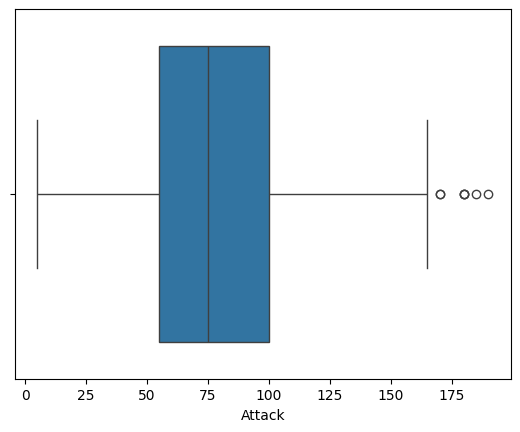

In [5]:
sns.boxplot(data=df, x='Attack')

<Axes: xlabel='Attack'>

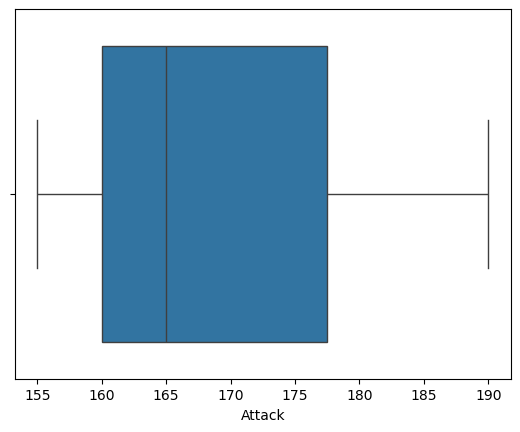

In [21]:
#  Pokemons exist with an Attack value greater than 150
df_attack = df[df['Attack'] > 150]
sns.boxplot(data=df_attack, x='Attack')

##### 2. Select all pokemons with a Speed of `10` or less

In [23]:
slow_pokemons_df = df[df['Speed'] <= 10]

##### 3. How many Pokemons have a `Sp. Def` value of 25 or less?

In [25]:
count = (df['Sp. Def'] <= 50).sum()
print(count)

210


##### 4. Select all the Legendary pokemons

In [27]:
# Try your code here
legendary_df = df[df['Legendary'] == True]


##### 5. Find the outlier

Find the pokemon that is clearly an outlier in terms of Attack / Defense:

In [31]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


       #                     Name   Type 1    Type 2  Total   HP  Attack  \
163  150      MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190   
232  214  HeracrossMega Heracross      Bug  Fighting    600   80     185   
424  383    GroudonPrimal Groudon   Ground      Fire    770  100     180   
426  384    RayquazaMega Rayquaza   Dragon    Flying    780  105     180   
429  386       DeoxysAttack Forme  Psychic       NaN    600   50     180   
494  445    GarchompMega Garchomp   Dragon    Ground    700  108     170   
711  646       KyuremBlack Kyurem   Dragon       Ice    700  125     170   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
163      100      154      100    130           1       True  
232      115       40      105     75           2      False  
424      160      150       90     90           3       True  
426      100      180      100    115           3       True  
429       20      180       20    150           3       True  
494      115 

In [33]:
#  Find outliers in attack
outliers_attack = find_outliers(df, 'Attack')
print(outliers_attack)

       #                     Name   Type 1    Type 2  Total   HP  Attack  \
163  150      MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190   
232  214  HeracrossMega Heracross      Bug  Fighting    600   80     185   
424  383    GroudonPrimal Groudon   Ground      Fire    770  100     180   
426  384    RayquazaMega Rayquaza   Dragon    Flying    780  105     180   
429  386       DeoxysAttack Forme  Psychic       NaN    600   50     180   
494  445    GarchompMega Garchomp   Dragon    Ground    700  108     170   
711  646       KyuremBlack Kyurem   Dragon       Ice    700  125     170   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
163      100      154      100    130           1       True  
232      115       40      105     75           2      False  
424      160      150       90     90           3       True  
426      100      180      100    115           3       True  
429       20      180       20    150           3       True  
494      115 

In [37]:
#  Find outliers in Defense
outliers_defense = find_outliers(df, 'Defense')
print(outliers_defense)

       #                   Name   Type 1   Type 2  Total   HP  Attack  \
87    80    SlowbroMega Slowbro    Water  Psychic    590   95      75   
98    91               Cloyster    Water      Ice    525   50      95   
103   95                   Onix     Rock   Ground    385   35      45   
223  208                Steelix    Steel   Ground    510   75      85   
224  208    SteelixMega Steelix    Steel   Ground    610   75     125   
230  213                Shuckle      Bug     Rock    505   20      10   
332  306                 Aggron    Steel     Rock    530   70     110   
333  306      AggronMega Aggron    Steel      NaN    630   70     140   
414  377               Regirock     Rock      NaN    580   80     100   
424  383  GroudonPrimal Groudon   Ground     Fire    770  100     180   
430  386    DeoxysDefense Forme  Psychic      NaN    600   50      70   
456  411              Bastiodon     Rock    Steel    495   60      52   
789  713                Avalugg      Ice      NaN  

![Who's this guy?](output1.png)

In [ ]:
# You say his name is Shuckle!! are you sure about that ? why don't you prove it using code...

**before you go ahead can you explain to me what is an outiler ??**

Your Explanation: an outlier is an extreme value , may be too high or too low , it affects the visualizayion, mean andstandard deviation but doesn't affect median and mode.


##### 6. How many Fire-Flying Pokemons are there?
##### Type 1 fire and Type 2 Flying ???

In [43]:
#number of type1 one fire
fire_pokemon_count = (df['Type 1'] == 'Fire').sum()
print(f"Number of Fire-type Pokemon: {fire_pokemon_count}")


Number of Fire-type Pokemon: 52


In [47]:
#number of type 2 flying
flying_pokemon_count = (df['Type 2'] == 'Flying').sum()
print(f"Number of Flying-type Pokemon: {flying_pokemon_count}")


Number of Flying-type Pokemon: 97


##### 7. How many 'Poison' pokemons are across both types?

In [53]:
poison_type1_count=(df['Type 1'] == 'Poison').sum()
print(f"Number of poison-type1 Pokemon: {poison_type1_count}")

Number of poison-type1 Pokemon: 28


In [55]:
poison_type2_count=(df['Type 2'] == 'Poison').sum()
print(f"Number of poison-type2 Pokemon: {poison_type2_count}")

Number of poison-type2 Pokemon: 34


In [59]:
total_poison_count= ((df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')).sum()
print(f"Total number of Poison-type Pokemon: {total_poison_count}")


Total number of Poison-type Pokemon: 62


##### 8. Name the pokemon of `Type 1` *Ice* which has the strongest defense?
##### I heard his name is Avalugg !!

In [67]:
ice_pokemon_df = df[df['Type 1'] == 'Ice']  # Filter Ice-type Pokemon
strongest_defense_pokemon = ice_pokemon_df.loc[ice_pokemon_df['Defense'].idxmax()]  # Find the highest Defense

print(strongest_defense_pokemon[['Name', 'Defense']])


Name       Avalugg
Defense        184
Name: 789, dtype: object


##### 9. What's the most common `Type 1` of Legendary Pokemons?

In [71]:
most_common_legendary_type = df[df['Legendary'] == True]['Type 1'].value_counts().idxmax() #filter only legendary and type 1, idxmax finds most frequent
print(f"Most common Type 1 among Legendary Pokemon: {most_common_legendary_type}")


Most common Type 1 among Legendary Pokemon: Psychic
